# RNN
n 元语法模型，其中单词xt在时间步t的条件概率仅取决于前面n−1个单词。

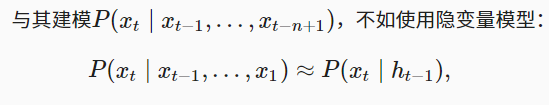
其中 ht−1 是隐藏状态（也称为隐藏变量），其存储了到时间步 t−1 的序列信息。（其实就是再创建一个变量，记录到当前的累积量。）

从技术上讲，隐藏状态是我们在给定步骤所做的任何事情的“输入”。隐藏状态只能通过查看先前时间点的数据来计算。

隐藏层和隐藏状态指的是两个截然不同的概念。

循环神经网络（Recurrent neural networks， RNNs）是具有隐藏状态的神经网络

## 1、无隐藏状态的神经网络

## 2、具有隐藏状态的循环神经网络
当前时间步的隐藏变量计算由当前时间步的输入与前一个时间步的隐藏变量一起确定：

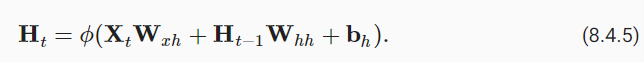
对于时间步 t ，输出层的输出类似于多层感知机中的计算：
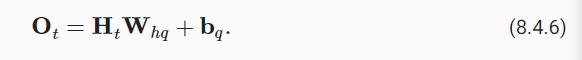
即使在不同的时间步，循环神经网络也总是使用这些模型参数。因此，循环神经网络的参数开销不会随着时间步的增加而增加。

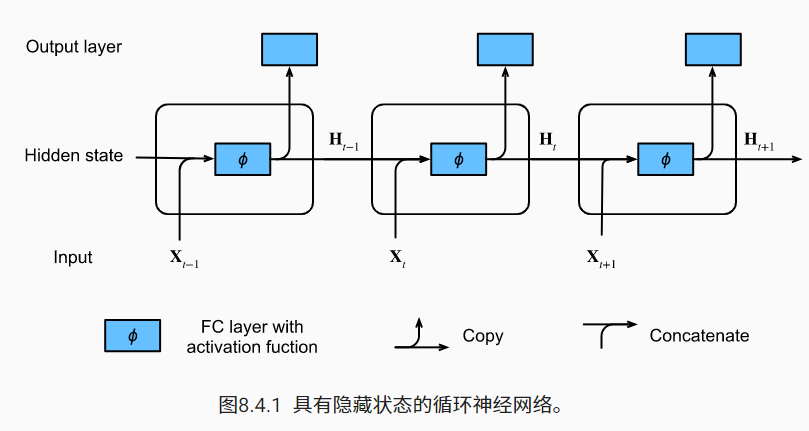

In [2]:
import torch
from d2l import torch as d2l
import sys
sys.path.append('../../CommonFunctions/tools/')
import sequence_tools

隐藏状态的计算 XtWxh+Ht−1Whh ，相当于 Xt 和 Ht−1 连结和 Wxh 和 Whh 连结的矩阵乘法。

In [3]:
X, W_xh = torch.normal(0, 1, (3, 1)), torch.normal(0, 1, (1, 4))
H, W_hh = torch.normal(0, 1, (3, 4)), torch.normal(0, 1, (4, 4))
torch.matmul(X, W_xh) +  torch.matmul(H, W_hh)

tensor([[ 1.5841,  1.8924, -0.1925,  1.1304],
        [-1.5711,  2.2685,  3.3214, -1.9580],
        [-0.7695, -1.9402, -1.6221, -0.4894]])

In [4]:
X, H, W_xh, W_hh

(tensor([[ 0.3576],
         [ 0.5842],
         [-1.1013]]),
 tensor([[ 0.4157,  1.2256,  1.2382,  0.0781],
         [-2.4588, -1.0535, -0.4431, -1.3722],
         [-0.9955, -0.6182, -1.3142, -0.0066]]),
 tensor([[0.1746, 1.1451, 1.6072, 0.0907]]),
 tensor([[-0.2893, -0.0820, -0.1852,  0.0261],
         [ 1.1975,  1.4814, -1.0403,  1.0840],
         [ 0.0910, -0.1073,  0.5211, -0.2367],
         [ 0.7889, -2.1214, -0.7740,  0.6629]]))

In [6]:
torch.cat((X, H), 1) # 沿列（轴1）连结矩阵X和H，

tensor([[ 0.3576,  0.4157,  1.2256,  1.2382,  0.0781],
        [ 0.5842, -2.4588, -1.0535, -0.4431, -1.3722],
        [-1.1013, -0.9955, -0.6182, -1.3142, -0.0066]])

In [7]:
torch.cat((W_xh, W_hh), 0) # 沿行（轴0）连结矩阵W_xh和W_hh

tensor([[ 0.1746,  1.1451,  1.6072,  0.0907],
        [-0.2893, -0.0820, -0.1852,  0.0261],
        [ 1.1975,  1.4814, -1.0403,  1.0840],
        [ 0.0910, -0.1073,  0.5211, -0.2367],
        [ 0.7889, -2.1214, -0.7740,  0.6629]])

In [8]:
torch.matmul(torch.cat((X, H), 1), torch.cat((W_xh, W_hh), 0))

tensor([[ 1.5841,  1.8924, -0.1925,  1.1304],
        [-1.5711,  2.2685,  3.3214, -1.9580],
        [-0.7695, -1.9402, -1.6221, -0.4894]])

## 3、基于循环神经网络的字符级语言模型
使用循环神经网络来构建语言模型。设小批量大小为1，文本序列为“machine”。为了简化后续部分的训练，我们将文本标记化为字符而不是单词，并考虑使用字符级语言模型（character-level language model）。
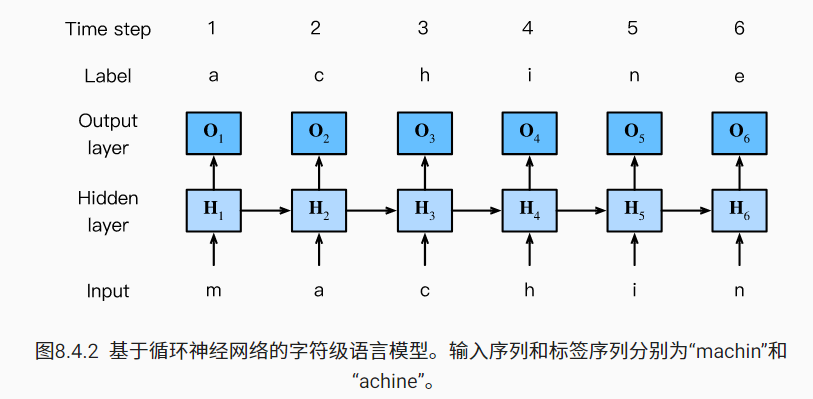

在训练过程中，我们对每个时间步长的输出层的输出进行softmax操作，然后利用交叉熵损失计算模型输出和标签之间的误差。例如：时间步3的损失将取决于基于该时间步的特征序列“m”、“a”、“c”生成的下一个字符概率分布和标签“h”。

实际上，每个标记都由一个 d 维向量表示，我们使用批量大小 n>1 。因此，输入 Xt 在时间步 t 将是 n×d 矩阵。

## 4、困惑度
问题：如何度量语言模型质量？——使用困惑度

